# 実データで演習

1. データの読み込み
2. データの確認
3. 入力変数と出力変数の切り分け
4. モデル構築と検証
5. 訓練データと検証データ
6. 予測値の計算とモデルの保存・読み込み
7. パラメータの確認


## データの読み込み

In [67]:
!pip install --upgrade pandas numpy

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
import numpy as np
import pandas as pd
print(np.__version__)
print(pd.__version__)

1.21.6
1.3.5


In [26]:
# csvファイルの読み込み (ボストン近郊の住宅価格データ)
df = pd.read_csv("housing.csv")
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [4]:
df.shape

(506, 14)

In [10]:
# 各カラムのデータ型や、空の項目がないかを調べる
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      506 non-null    float64
 1   x2      506 non-null    float64
 2   x3      506 non-null    float64
 3   x4      506 non-null    int64  
 4   x5      506 non-null    float64
 5   x6      506 non-null    float64
 6   x7      506 non-null    float64
 7   x8      506 non-null    float64
 8   x9      506 non-null    int64  
 9   x10     506 non-null    int64  
 10  x11     506 non-null    float64
 11  x12     506 non-null    float64
 12  x13     506 non-null    float64
 13  y       506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# データの確認

In [12]:
import seaborn as sns

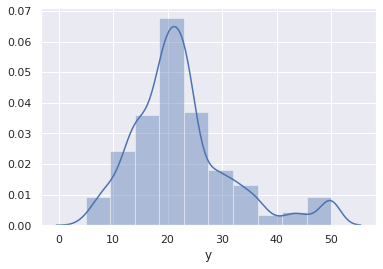

In [13]:
# ヒストグラム
# 補助線
sns.set()
# bins: 目盛りの幅
sns.distplot(df["y"], bins=10)

## 相関係数

In [14]:
# 相関係数の算出
# 予測値と相関が高いものが重要な要素なのではないか的な予測ができる。
# 逆に相関が低すぎるものは特徴量として扱わないなどの判断もできる。
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
x6,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
x7,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
x8,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
x9,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
x10,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


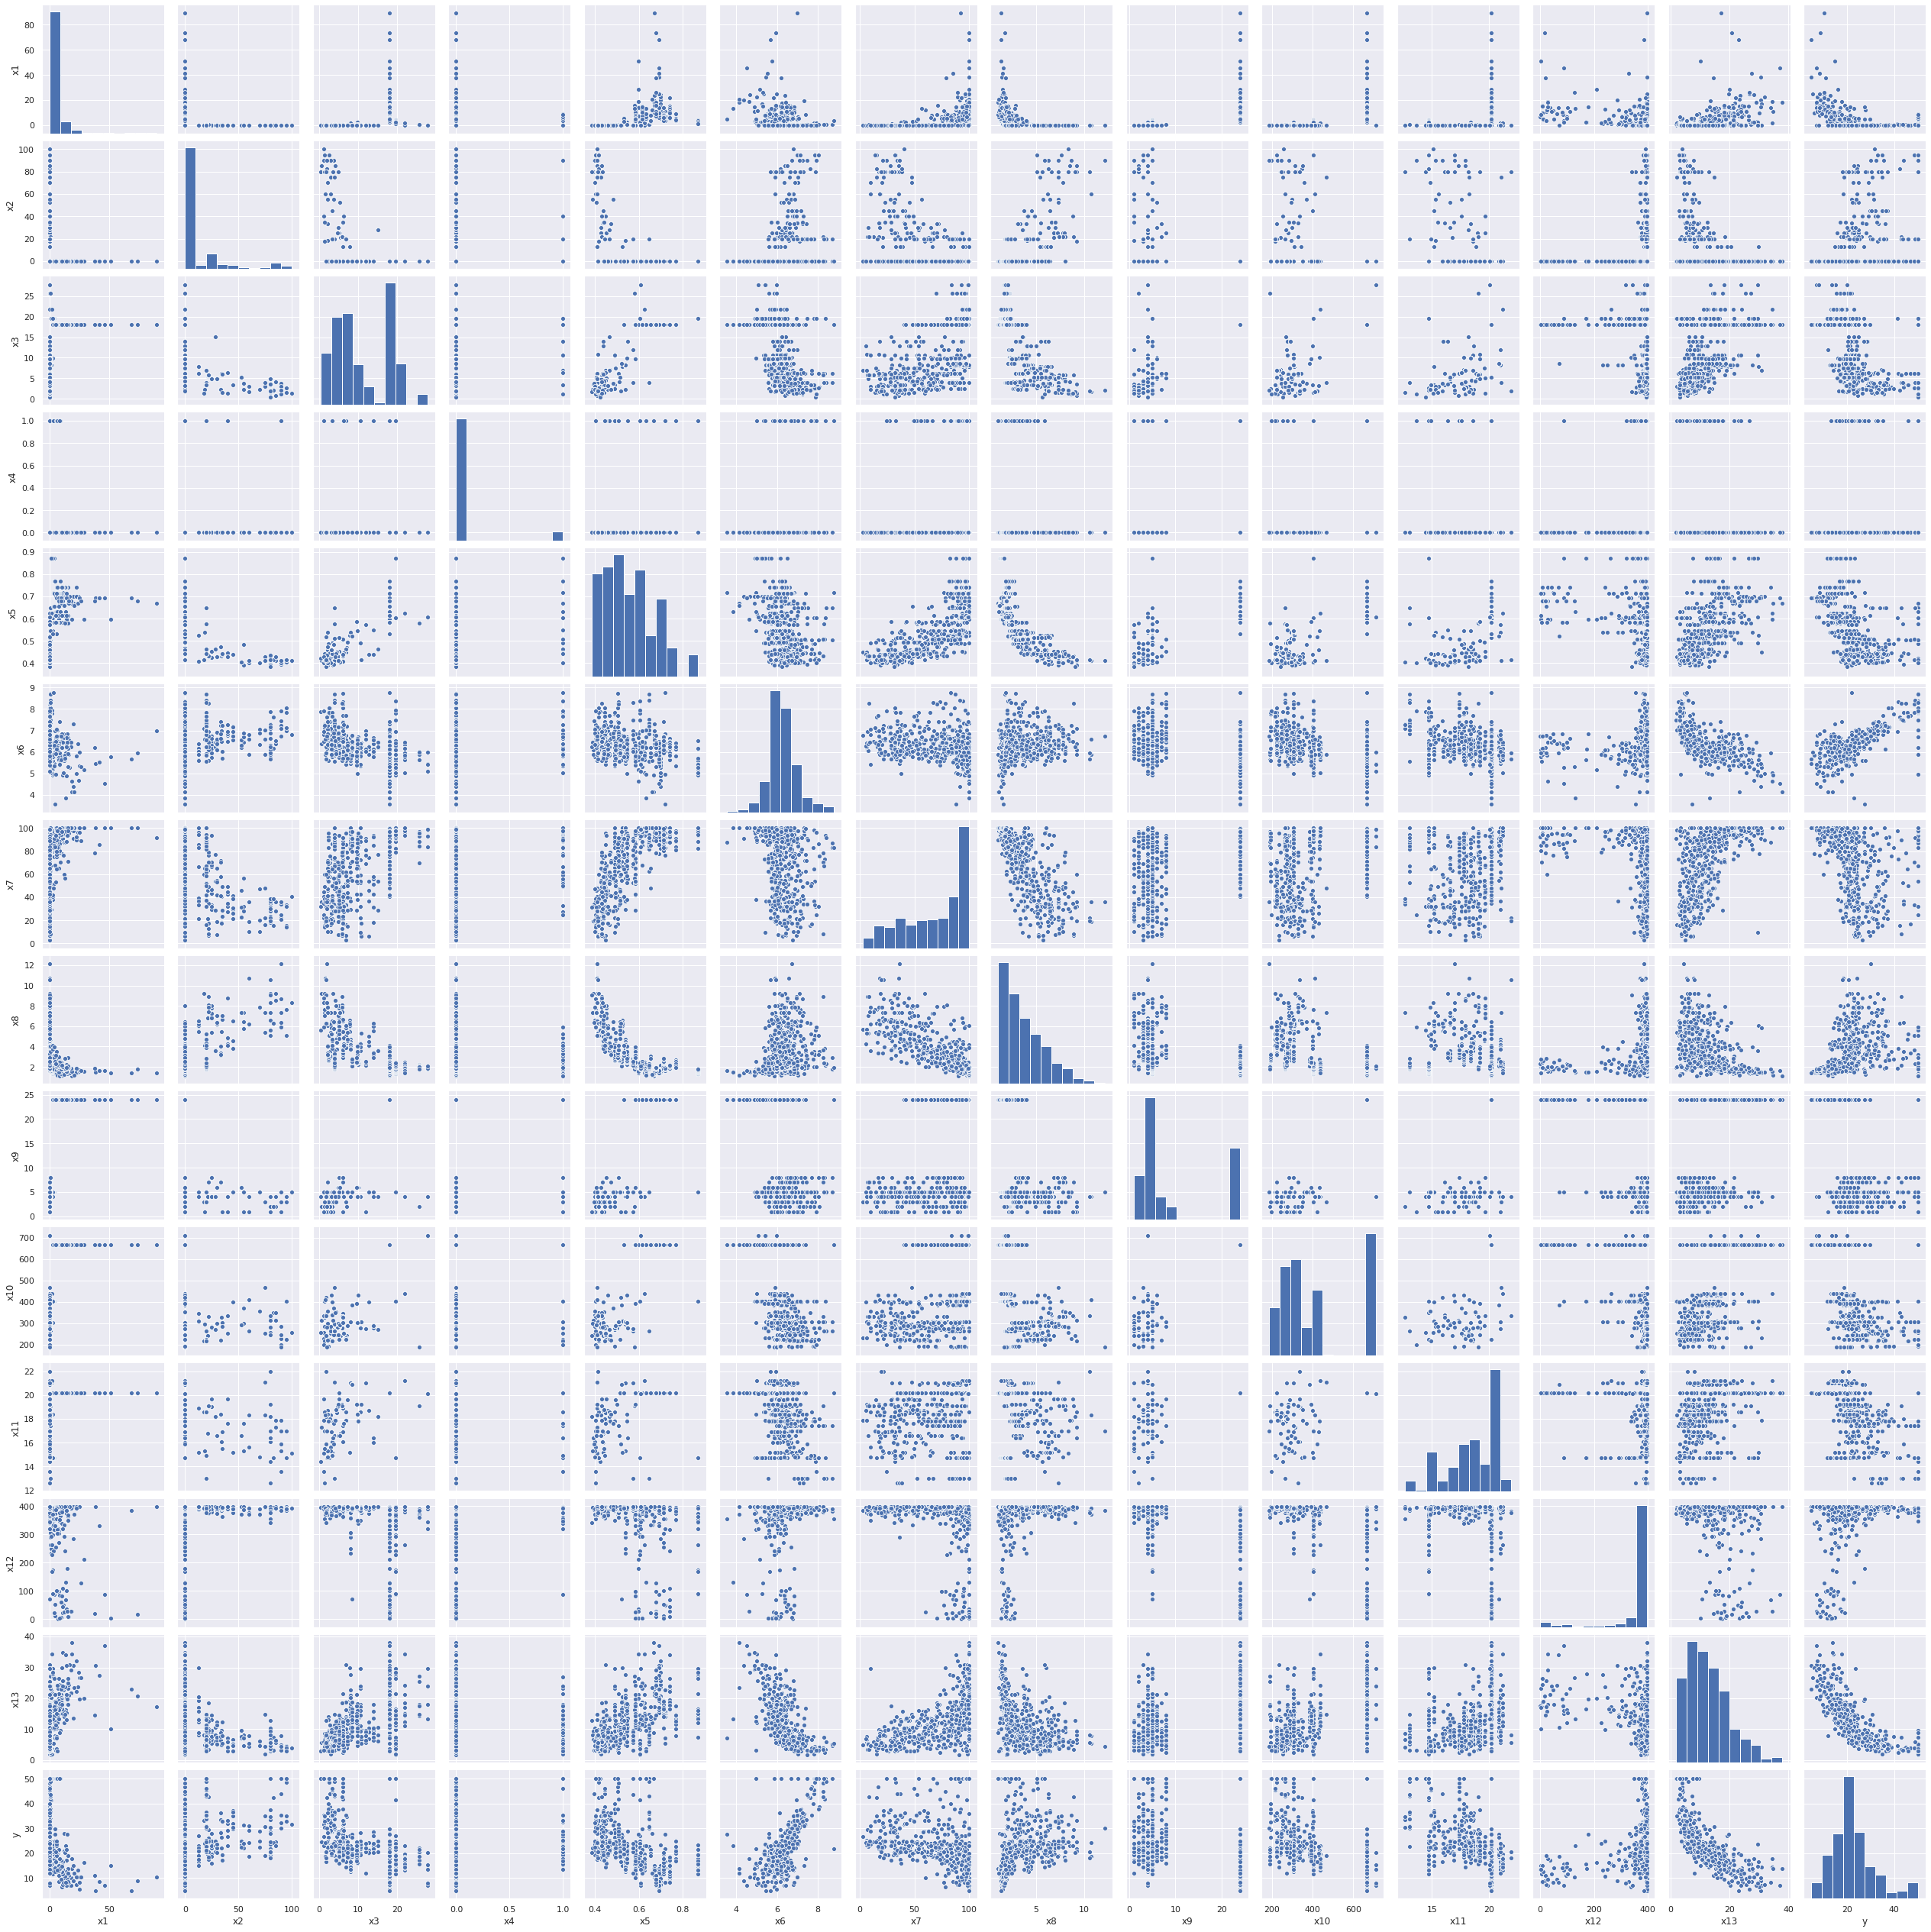

In [16]:
# 相関の可視化
sns.pairplot(df)

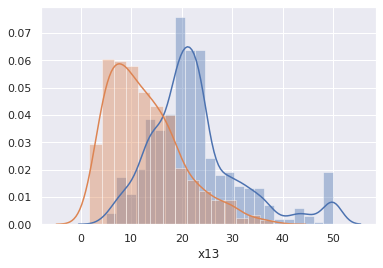

In [22]:
# 相関が高いものはデータの分布が似ている
sns.distplot(df["y"])
sns.distplot(df["x13"])

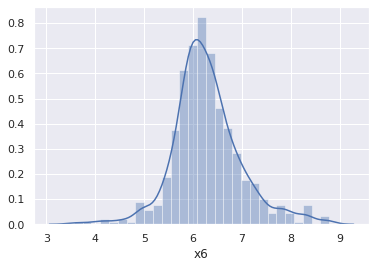

In [24]:
sns.distplot(df["x6"])

## 3.入力変数と出力変数の切り分け

In [25]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [36]:
## df.iloc[行, 列]
# データフレームを切り分けて取り出すメソッド

# 入力変数
# 行: すべて
# 列: 0 ~ 13行目
df.iloc[:, :-1]

# 出力変数
# 行: すべて
# 列: 最終列
df.iloc[:, -1]


## df.drop
# データフレームのいち部を削除する
# axis: 0: 行方向に削除, 1: 列方向に削除
df.drop("y", axis=1)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## 4. モデルの構築と検証

x -> 入力値  
t -> 目標値 (教師データ(target))

In [38]:
x = df.drop("y", axis=1)
t = df["y"]

In [43]:
# linearRegressionは線形モデル。 
# 線形モデル: https://tomoshige-n.hatenablog.com/entry/2014/08/14/013616
from sklearn.linear_model import LinearRegression

In [44]:
# モデルの宣言
model = LinearRegression()

In [45]:
# 学習
model.fit(x, t)

LinearRegression()

In [47]:
# 検証 
# 決定係数: 線形モデルが実際のデータにどのくらい当てはまっているか (1に近いほどいいモデル)
model.score(x ,t)

0.7406426641094095

## 5. 訓練データと検証データ

例 ) 受験勉強１０年分の過去問を購入

### 悪いケース

- 10年分で勉強 (学習)
- 10年分で実力テスト (検証)

### 良いケース

- 5年分で勉強 (学習) -> 訓練データ
- 5年分で実力テスト (検証) -> 検証データ

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# 分割
# test_size: 訓練データの割合
# random_state: 訓練データを選択する際に生成する乱数のシード値(これを固定しておかないと実行ごとに結果が変わってしまう)
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.4, random_state=1)

In [50]:
len(x_train), len(x_test)

(303, 203)

In [52]:
len(t_train), len(t_test)

(303, 203)

In [56]:
# モデルの学習 (パラメータを計算している)
model.fit(x_train, t_train)

LinearRegression()

In [57]:
# 検証(訓練データ)
model.score(x_train, t_train)

0.7468316520140625

In [60]:
# 検証(検証データ)
model.score(x_test, t_test)

0.7209056672661768

## 6. 予測値の計算とモデルの保存・読み込み

### 予測値の計算

In [65]:
sample = x.iloc[0, :]
print(sample.shape)

# 1行, 13列 のデータにリシェイプ
sample_rs = np.array(sample).reshape(1, -1)
print(sample_rs.shape)

# 予測
y_pred = model.predict(sample_rs)
y_pred

(13,)
(1, 13)


array([29.42368847])

In [66]:
# リシェイプしなくてもできる
y_pred = model.predict([sample])
y_pred[0]

29.423688469405555

### モデルの保存

In [68]:
# from sklearn.externals import joblib
import joblib

In [69]:
joblib.dump(model, "model.pkl")

['model.pkl']

### モデルの読み込み

In [70]:
model_new = joblib.load("model.pkl")

In [71]:
model_new.predict([sample])[0]

29.423688469405555

## 7. パラメータの確認

In [72]:
# パラメータwの値
model.coef_

array([-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,  2.18579583e+00,
       -1.72053975e+01,  3.63606995e+00,  2.05579939e-03, -1.36602886e+00,
        2.89576718e-01, -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
       -5.04008320e-01])

In [75]:
# precision: 有効桁数(小数点以下)
# suppress: 指数関数表示を行わない
np.set_printoptions(
    precision=3,
    suppress=True,
)

In [80]:
model.coef_

array([ -0.09 ,   0.067,   0.05 ,   2.186, -17.205,   3.636,   0.002,
        -1.366,   0.29 ,  -0.012,  -0.835,   0.009,  -0.504])

In [82]:
# 変数のスケールが違うので、重みを見るだけではどの変数が影響を与えているかわからない、、、
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
